<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**
 - A neuron in a nueral network is also known as a node is a set of inputs, weights, and a bias value. The output of a node is either observed or passed along to the next layer in the network.
- **Input Layer:**
 - The input layer is the starting point for any nueral network. This layer receives the initial input from our data set. All of the remaining layers will be a derivative of the input layer.
- **Hidden Layer:**
 - The hidden layer(s) comes after the input layer and can not be directly accessed. The hidden layers apply weights or transformations that produce an output specific to an intended result. The hidden layer(s) can only be accessed through the input layer. The "Deep Learning" phrase comes from a networks ability to have multiple layers. 
- **Output Layer:**
 - The output layer returns vector values in a format that is desired. An activation function is usually applied to achieve a desired transformation of data into a workable format.
- **Activation Function:**
 - Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron's input is relevant for the model's prediction.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

#### Answer
 - It is the practice of fine-tuning the weights of a neural net based on the error rate or loss obtained in the previous epoch.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

#### Answer
 - A simple perceptron takes inputs, that get passed to weights, those weights are then summed, a step function is applied, and an output is given. 

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [3]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [5]:
X[1]

array([0.97873798, 2.2408932 ])

In [6]:
y[4]

1

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [4]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import normalize
import numpy as np

In [8]:
#sequential modeling, order of added layers matters
model1 = Sequential()

#the order you add layers builds your architecture

#input node
model1.add(Dense(2, activation='sigmoid'))

#output
model1.add(Dense(1, activation='sigmoid'))

#compiler
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

h1 = model1.fit(X, y, epochs=500)
h1

Train on 300 samples
Epoch 1/500
300/300 [==============================] - 0s 989us/sample - loss: 0.2588 - accuracy: 0.5467
Epoch 2/500
300/300 [==============================] - 0s 105us/sample - loss: 0.2584 - accuracy: 0.5500
Epoch 3/500
300/300 [==============================] - 0s 111us/sample - loss: 0.2581 - accuracy: 0.5433
Epoch 4/500
300/300 [==============================] - 0s 106us/sample - loss: 0.2578 - accuracy: 0.5367
Epoch 5/500
300/300 [==============================] - 0s 102us/sample - loss: 0.2575 - accuracy: 0.5333
Epoch 6/500
300/300 [==============================] - 0s 92us/sample - loss: 0.2572 - accuracy: 0.5300
Epoch 7/500
300/300 [==============================] - 0s 84us/sample - loss: 0.2570 - accuracy: 0.5333
Epoch 8/500
300/300 [==============================] - 0s 116us/sample - loss: 0.2567 - accuracy: 0.5300
Epoch 9/500
300/300 [==============================] - 0s 85us/sample - loss: 0.2565 - accuracy: 0.5267
Epoch 10/500
300/300 [===============

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using Keras. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. You must also monitor the metric 'accuracy'.

In [10]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [11]:
model2 = Sequential()

#inputs
model2.add(Dense(2, activation='sigmoid'))

#hidden
model2.add(Dense(30, activation='relu'))
model2.add(Dense(25, activation='relu'))

#output
model2.add(Dense(1, activation='sigmoid'))

#compile
model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#implementing myCallback function
h2 = model2.fit(X, y, epochs=500, callbacks=[myCallback()])
h2

Train on 300 samples
Epoch 1/500
300/300 [==============================] - 0s 1ms/sample - loss: 0.2501 - accuracy: 0.4733
Epoch 2/500
300/300 [==============================] - 0s 135us/sample - loss: 0.2488 - accuracy: 0.5467
Epoch 3/500
300/300 [==============================] - 0s 84us/sample - loss: 0.2481 - accuracy: 0.5867
Epoch 4/500
300/300 [==============================] - 0s 97us/sample - loss: 0.2469 - accuracy: 0.5267
Epoch 5/500
300/300 [==============================] - 0s 89us/sample - loss: 0.2462 - accuracy: 0.5267
Epoch 6/500
300/300 [==============================] - 0s 94us/sample - loss: 0.2447 - accuracy: 0.5267
Epoch 7/500
300/300 [==============================] - 0s 110us/sample - loss: 0.2438 - accuracy: 0.5267
Epoch 8/500
300/300 [==============================] - 0s 112us/sample - loss: 0.2428 - accuracy: 0.5267
Epoch 9/500
300/300 [==============================] - 0s 76us/sample - loss: 0.2418 - accuracy: 0.5267
Epoch 10/500
300/300 [===================

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [13]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 851 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/envs/thisthing/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


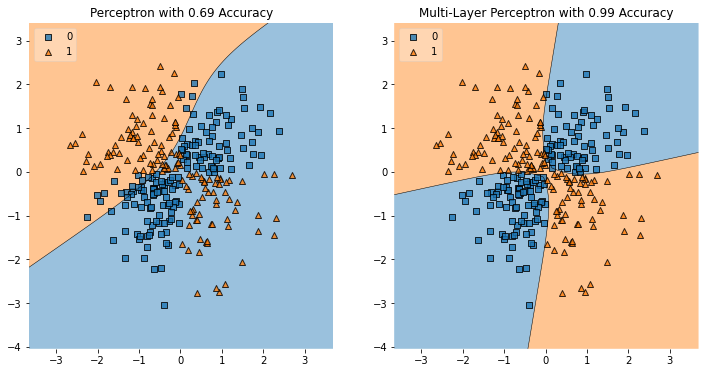

In [14]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

### Answers
#### Why does the Perceptron (model1) only achieve ~70% accuracy?
 - The Model achieves 70% accuracy because there is only one dense layer with a single neuron, which can only describe a linear relationship in the model.

#### What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y?
 - The hidden layer is the architectural property. This allows it to learn the non-linear relationship between the data.
 
#### Why might this property be useful in more complex data such as images?
 - This is useful because images are full of non-linear relationships. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0


In [17]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values
y = df['target'].values

In [18]:
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [19]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[:10])

[[-0.26098049  0.68100522 -0.93851463 -0.20696359  0.1688269  -0.41763453
   0.89896224  0.49647834  1.43548113 -0.89686172  0.97635214  0.26508221
   1.12302895]
 [ 0.40075247  0.68100522 -0.93851463  0.82106867 -0.54621594 -0.41763453
   0.89896224 -1.95242994 -0.69663055  0.82852939 -0.64911323  0.26508221
   1.12302895]
 [-1.58444641  0.68100522  1.97312292  0.47839125 -0.91340011 -0.41763453
   0.89896224  1.23989692  1.43548113  0.31091206  0.97635214 -0.71442887
   1.12302895]
 [-1.91531289  0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
   0.89896224  1.63347147 -0.69663055  2.12257273 -2.27457861 -0.71442887
  -0.51292188]
 [ 0.5110413   0.68100522  1.97312292  2.19177836  0.80656782 -0.41763453
  -1.00583187  0.40901733 -0.69663055 -0.7243226  -0.64911323 -0.71442887
   1.12302895]
 [ 1.06248543 -1.46841752 -0.93851463  2.7629074   1.52161066 -0.41763453
   0.89896224  0.19036481  1.43548113 -0.89686172  0.97635214 -0.71442887
  -0.51292188]
 [-0.48155814 -1.46841

In [20]:
#baseline

#declare sequential
model = Sequential()

#inputs
model.add(Dense(13, activation='sigmoid'))

#hidden
model.add(Dense(30, activation='relu'))
model.add(Dense(25, activation='relu'))

#output
model.add(Dense(1, activation='sigmoid')) #softmax run did not work

#compile
model.compile(loss='binary_crossentropy', metrics=['mse', 'mae', 'accuracy'])

#fit
model.fit(X, y, epochs=5)

Train on 303 samples
Epoch 1/5
303/303 [==============================] - 1s 2ms/sample - loss: 0.6941 - mse: 0.2505 - mae: 0.4976 - accuracy: 0.5050
Epoch 2/5
303/303 [==============================] - 0s 131us/sample - loss: 0.6619 - mse: 0.2344 - mae: 0.4830 - accuracy: 0.6898
Epoch 3/5
303/303 [==============================] - 0s 94us/sample - loss: 0.6405 - mse: 0.2239 - mae: 0.4708 - accuracy: 0.7327
Epoch 4/5
303/303 [==============================] - 0s 112us/sample - loss: 0.6189 - mse: 0.2133 - mae: 0.4583 - accuracy: 0.7591
Epoch 5/5
303/303 [==============================] - 0s 102us/sample - loss: 0.5955 - mse: 0.2021 - mae: 0.4440 - accuracy: 0.7723


In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  182       
_________________________________________________________________
dense_13 (Dense)             multiple                  420       
_________________________________________________________________
dense_14 (Dense)             multiple                  775       
_________________________________________________________________
dense_15 (Dense)             multiple                  26        
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


In [22]:
#for baseline without hyperparams
scores = model.evaluate(X, y)
print("\n")
print("Validation Data Metrics:")
print(f"{model.metrics_names[0]}: {scores[:]}")
print(f"{model.metrics_names[1]}: {scores[1]*100}")
print(f"{model.metrics_names[2]}: {scores[:]}")
print(f"{model.metrics_names[3]}: {scores[:]}")

303/303 [==============================] - 0s 1ms/sample - loss: 0.5780 - mse: 0.1938 - mae: 0.4331 - accuracy: 0.7822


Validation Data Metrics:
loss: [0.5780182653921272, 0.19375671, 0.43314955, 0.7821782]
mse: 19.375671446323395
mae: [0.5780182653921272, 0.19375671, 0.43314955, 0.7821782]
accuracy: [0.5780182653921272, 0.19375671, 0.43314955, 0.7821782]


In [23]:
"""
Then hyperparameter tune at least two parameters and report your model's accuracy. 
Use the Heart Disease Dataset (binary classification). 
Use an appropriate loss function for a binary classification task. 
Use an appropriate activation function on the final layer of your network. 
Train your model using verbose output for ease of grading. 
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. 
(for at least two hyperparameters) When hyperparameter tuning, 
show you work by adding code cells for each new experiment. 
Report the accuracy for each combination of hyperparameters as you test them so 
that we can easily see which resulted in the highest accuracy. 
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

Most important:

batch_size
training epochs
optimization algorithms
learning rate
momentum
activation functions
dropout regularization
number of neurons in the hidden layer

"""

#model with hyperparams
#hyperparameter tuning
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Important Hyperparameters
inputs = X.shape[1]
epochs = 200
#every time you see 10 data points, update the weights
batch_size = 10 


# Create Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #activation output for binary

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'accuracy'])

# Fit Model
model.fit(X, y, 
          epochs=epochs, 
          batch_size=batch_size
         )

Train on 303 samples
Epoch 1/200
303/303 [==============================] - 0s 2ms/sample - loss: 0.2119 - mse: 0.2119 - mae: 0.4463 - accuracy: 0.6799
Epoch 2/200
303/303 [==============================] - 0s 214us/sample - loss: 0.1394 - mse: 0.1394 - mae: 0.3307 - accuracy: 0.8251
Epoch 3/200
303/303 [==============================] - 0s 180us/sample - loss: 0.1185 - mse: 0.1185 - mae: 0.2795 - accuracy: 0.8581
Epoch 4/200
303/303 [==============================] - 0s 250us/sample - loss: 0.1075 - mse: 0.1075 - mae: 0.2512 - accuracy: 0.8581
Epoch 5/200
303/303 [==============================] - 0s 302us/sample - loss: 0.1015 - mse: 0.1015 - mae: 0.2322 - accuracy: 0.8680
Epoch 6/200
303/303 [==============================] - 0s 233us/sample - loss: 0.0960 - mse: 0.0960 - mae: 0.2203 - accuracy: 0.8812
Epoch 7/200
303/303 [==============================] - 0s 295us/sample - loss: 0.0914 - mse: 0.0914 - mae: 0.2096 - accuracy: 0.8845
Epoch 8/200
303/303 [=============================

In [24]:
#iterating over batch size...
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values
y = df['target'].values

# Function to create model, required for KerasClassifier
def create_model():
    #create
    model = Sequential()
    #input
    model.add(Dense(15, input_dim=13, activation='relu'))
    #output
    model.add(Dense(1, activation='sigmoid'))
    #compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#keras
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [70]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.7955191373825073 using {'batch_size': 10, 'epochs': 70}
Means: 0.7955191373825073, Stdev: 0.03151855220851633 with: {'batch_size': 10, 'epochs': 70}
Means: 0.7626775979995728, Stdev: 0.038121405831096196 with: {'batch_size': 20, 'epochs': 70}
Means: 0.7159016370773316, Stdev: 0.060134209330261736 with: {'batch_size': 40, 'epochs': 70}
Means: 0.6593442559242249, Stdev: 0.09546783280192245 with: {'batch_size': 60, 'epochs': 70}
Means: 0.6830054521560669, Stdev: 0.07445470431746028 with: {'batch_size': 80, 'epochs': 70}
Means: 0.5477595508098603, Stdev: 0.07590228264405897 with: {'batch_size': 100, 'epochs': 70}


In [25]:
#epochs, tune last

# define the grid search parameters
param_grid = {'batch_size': [10],
              'epochs': [20, 40, 70, 100, 120, 150, 170, 190]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8186338782310486 using {'batch_size': 10, 'epochs': 120}
Means: 0.6933333396911621, Stdev: 0.055635180367743585 with: {'batch_size': 10, 'epochs': 20}
Means: 0.7688524603843689, Stdev: 0.028465167613369015 with: {'batch_size': 10, 'epochs': 40}
Means: 0.8089071035385131, Stdev: 0.04113692262879547 with: {'batch_size': 10, 'epochs': 70}
Means: 0.7757923483848572, Stdev: 0.04616486650721591 with: {'batch_size': 10, 'epochs': 100}
Means: 0.8186338782310486, Stdev: 0.04923325681787224 with: {'batch_size': 10, 'epochs': 120}
Means: 0.8018579244613647, Stdev: 0.03021933648769745 with: {'batch_size': 10, 'epochs': 150}
Means: 0.7854098320007324, Stdev: 0.047810179446058254 with: {'batch_size': 10, 'epochs': 170}
Means: 0.8185245990753174, Stdev: 0.04281601183241412 with: {'batch_size': 10, 'epochs': 190}
